# Section 4 Simulation Analysis

This document replicates the simulation result of CTD-GM-TCN from Section 4 of Clustered Temporal Decomposition.

## Import required packages and define required parameters

In [2]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import brokenaxes as bax
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec

warnings.filterwarnings('ignore')

import util as util
import CTD_TCN
from TCN import TemporalConvNet
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import data_generator as gen

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
dataset_idx=15
diff=1
K = 5
M = 4
N = 1000
l_max = 6
T = 300
T_future = 5
lambda_rate = (M * (N + T) * np.log(N + T))/ (N * T)

# Each column represents the diagonal elements
# of Theta_ell, for ell=0,1,2,..., ell_max.

AR_params = [[ 0., -0.5,  0.2,  0.,  0.2,  0.,   0.],
             [0.,  0.3,  -0.1,  0., 0,  0., 0.],
             [0., 0,   0,  0,  0.,  0.,  -0.6],
             [ 0., -0.05,   0.,   0., -0.4,  0.,  0.0],
             [0.,   0.2,  0.02, 0.2,  0.2,   0., 0.0],
             [0.,  0.1,  0. ,  0., 0.,    -.5,   -.1],
             [0.,  0.,  0.2,  0.5,  0.,  0., -0.],
            ]

# Each row represents the location of the center
# of the kth cluster

centers = np.array([[0.,  1., 0.0,  1.],
                   [0.,  0., 2.,  1.],
                   [0., -1., 0.,  -1.],
                   [1.,  .0, -0.0, -1.],
                   [-1., -.0, -0.0,  0.]])

# Each entry in row k column m represents the 
# standard deviation of the kth cluster along the mth axis

sigmas = (1/5) * np.array([[0.5 , 0.2, 1., 1.],
                             [0.5 , 0.2, 1., 1.],
                             [0.5 , 0.2, 1., 1.],
                             [0.5 , 0.2, 1., 1.],
                             [0.5 , 0.2, 1., 1.]])

## Determine one of sixteen cases

In [4]:
### Property 1: observational noise ###

Z_sd = 5. # Large noise
#Z_sd = 3. # Small noise


### Property 2: missing entries ###

#p_missing = 0.05 # 5% of entries missing 
p_missing = 0.00 # No missing entries


### Property 3: dimensional imbalance ###

#Small - keep current
#sigmas[:,2:] = (2/5) #large


### Property 4: Cluster distances ###

#close together - keep current
centers *= 5; sigmas *= 5 #Far away

## Generate observed data

The generated dataset can be visualized similarly as `Simple_Demo_With_Instructions.ipynb`. It is skipped here.

In [5]:
data = gen.Simulate(N=N,T=T+T_future,
        tmp_params=np.array(AR_params)[:M,:].T, 
        centers=centers,
        Z_sd=Z_sd,
        sigmas=sigmas,
        p_missing=p_missing,
        difference=diff,
        seed=dataset_idx,
        AR_sd=0.2,
        torch_device=device)
data.generate()

#re-format for input to baseline TCN
slices = []
for lag in range (l_max + 1):
    slices.append(data.Z_obs.T[lag:(T - l_max + lag), :].unsqueeze(-1))
tmp = torch.cat(slices, dim=-1)
hist_data, future_data = tmp[:, :, :-1], tmp[:, :, -1]

## Run 100 loops of CTD-GM-TCN, and TCN-MF (from DeepGLO), and TCN

* `graphing_freq` determines how often graphical summary is printed. `graphing_freq=10` means it will print every 10 loops.
* `tmp_metric` can be chosen between "SMAPE" and "NRMSE".

CTD seed 0 begins
X singular values: tensor([141.1619,  77.3776,  37.6214,  22.1521], device='cuda:0')
#####################################
Pretraining finished on loop 1300 with loss 24.7187
#####################################
Loop 200 | overall_loss 24.7922 | x 0.0003 | y 0.0001 
Training finished | loop 229
overall 24.7678 | x 0.0003 | y 0.0001
TCNMF seed 0 begins
X singular values: tensor([141.1619,  77.3776,  37.6214,  22.1521], device='cuda:0')
#####################################
Pretraining finished on loop 1300 with loss 24.7187
#####################################
Loop 200 | overall_loss 24.7692 | x 0.0 | y 0.0001 
Loop 400 | overall_loss 24.7102 | x 0.0 | y 0.0001 
Training finished | loop 500
overall 24.7101 | x 0.0 | y 0.0001
TCN seed 0 begins


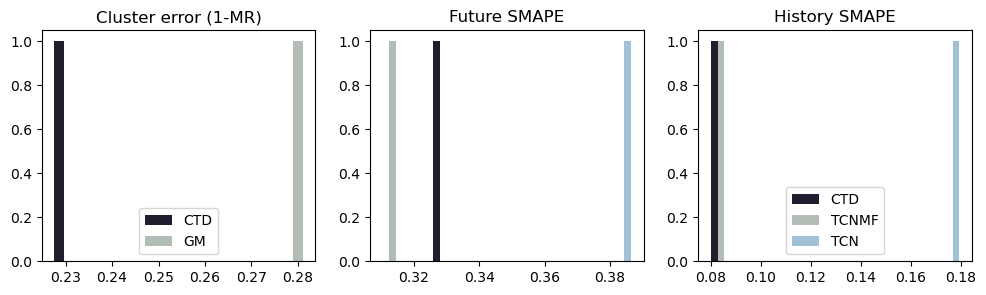

CTD seed 1 begins
X singular values: tensor([139.4206,  76.9422,  35.7163,  17.4604], device='cuda:0')
#####################################
Pretraining finished on loop 1216 with loss 24.9943
#####################################
Loop 200 | overall_loss 25.0434 | x 0.0003 | y 0.0001 
Training finished | loop 292
overall 24.9652 | x 0.0002 | y 0.0001
TCNMF seed 1 begins
X singular values: tensor([139.4206,  76.9422,  35.7163,  17.4604], device='cuda:0')
#####################################
Pretraining finished on loop 1216 with loss 24.9943
#####################################
Loop 200 | overall_loss 25.0274 | x 0.0 | y 0.0001 
Loop 400 | overall_loss 24.766 | x 0.0 | y 0.0001 
Training finished | loop 500
overall 24.7362 | x 0.0 | y 0.0001
TCN seed 1 begins
CTD seed 2 begins
X singular values: tensor([136.6171,  77.5380,  37.6149,  20.7830], device='cuda:0')
#####################################
Pretraining finished on loop 1317 with loss 24.7268
####################################

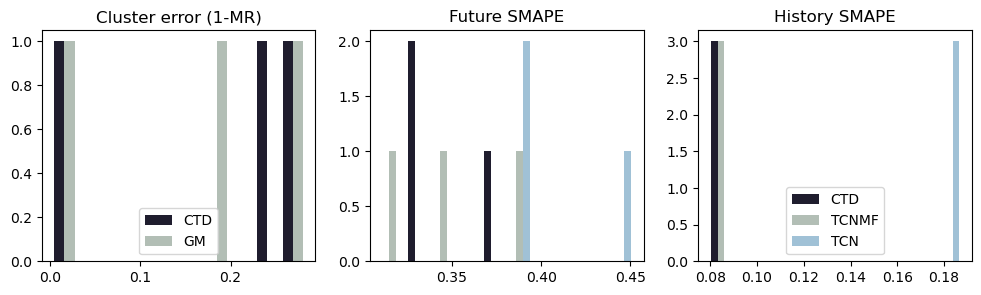

CTD seed 3 begins
X singular values: tensor([137.7896,  80.0758,  39.8059,  21.6533], device='cuda:0')
#####################################
Pretraining finished on loop 1316 with loss 24.7398
#####################################
Loop 200 | overall_loss 24.7872 | x 0.0003 | y 0.0001 
Training finished | loop 230
overall 24.7652 | x 0.0002 | y 0.0001
TCNMF seed 3 begins
X singular values: tensor([137.7896,  80.0758,  39.8059,  21.6533], device='cuda:0')
#####################################
Pretraining finished on loop 1316 with loss 24.7398
#####################################
Loop 200 | overall_loss 24.7717 | x 0.0 | y 0.0001 
Loop 400 | overall_loss 24.7231 | x 0.0 | y 0.0001 
Training finished | loop 500
overall 24.7229 | x 0.0 | y 0.0001
TCN seed 3 begins
CTD seed 4 begins
X singular values: tensor([139.6194,  75.5095,  36.2628,  14.8066], device='cuda:0')
#####################################
Pretraining finished on loop 1265 with loss 24.9835
###################################

KeyboardInterrupt: 

In [7]:
graphing_freq = 2
tmp_metric = "SMAPE" #"NRMSE"
    
CTD_hist_table = None
CTD_future_table = None
CTD_cluster_table = None
TCNMF_hist_table = None
TCNMF_future_table = None
TCNMF_cluster_table = None
TCN_hist_table = None
TCN_future_table = None
TCN_cluster_table = None

for seed in range(100):
    #Run CTD-GM-TCN
        
    print(f"CTD seed {seed} begins")
    fitter_full = CTD_TCN.CTDTCN(Z_obs = data.Z_obs[:,:T],
                     lags=l_max, 
                     K = K, 
                     M = M,
                     rbsize=1000,
                     cbsize=300,
                     lambda_all = 1e-3 * lambda_rate,
                     lambda_x = 1e-3 * lambda_rate,
                     lambda_y = 1e-3 * lambda_rate,
                     lr=0.005,
                     verbosity=200,
                     seed=seed,
                     pre_patience=5,
                     patience=5,
                     device='cuda') 
    fitter_full.fit(noise=0.5, max_loop=500)
    
    ######Compute performance and save####
    CTD_cluster_error = util.compute_cluster_performance(fitter_full.soft_labels, data.labels)
    cluster_tmp = util.compute_cluster_baselines(data.Z_obs[:,:T], M, data.labels, 
                                                       CTD_result=CTD_cluster_error,
                                                       seed=seed, save_to=None)
    if CTD_cluster_table is None:
        CTD_cluster_table = cluster_tmp
    else:
        CTD_cluster_table.loc[len(CTD_cluster_table.index)] = cluster_tmp.loc[0]

    CTD_hist_est = fitter_full.Z_hat().detach().cpu().numpy()
    CTD_future_est = fitter_full.predict(T_future).detach().cpu().numpy()

    future_tmp = util.compute_est_performance(pred=CTD_future_est[:,:T_future], 
                                 truth=data.Z_star[:, T:T+T_future], 
                                 history=data.Z_star[:, :T],
                                 method_name="CTDTCN_forecast",
                                 idx=seed, save_to=None)
    if CTD_future_table is None:
        CTD_future_table = future_tmp
    else:
        CTD_future_table.loc[len(CTD_future_table.index)] = future_tmp.loc[0]

    hist_tmp = util.compute_est_performance(pred=CTD_hist_est, 
                                 truth=data.Z_star[:, :T], 
                                 history=data.Z_star[:, :T],
                                 method_name="CTDTCN_history",
                                 idx=seed, save_to=None)

    if CTD_hist_table is None:
        CTD_hist_table = hist_tmp
    else:
        CTD_hist_table.loc[len(CTD_hist_table.index)] = hist_tmp.loc[0]
    
    
    ########################################
    
    #Run TCNMF
    print(f"TCNMF seed {seed} begins")
    fitter_TCNMF = CTD_TCN.CTDTCN(Z_obs = data.Z_obs[:,:T],
                     lags=l_max, 
                     K = K, 
                     M = M,
                     rbsize=1000,
                     cbsize=300,
                     lambda_all = 1e-3 * lambda_rate,
                     lambda_x = 0.,
                     lambda_y = 1e-3 * lambda_rate,
                     lr=0.005,
                     verbosity=200,
                     seed=seed,
                     pre_patience=5,
                     patience=5,
                     device='cuda') 
    fitter_TCNMF.fit(noise=0.5, max_loop=500)
    
    TCNMF_hist_est = fitter_TCNMF.Z_hat().detach().cpu().numpy()
    TCNMF_future_est = fitter_TCNMF.predict(T_future).detach().cpu().numpy()

    future_tmp = util.compute_est_performance(pred=TCNMF_future_est[:,:T_future], 
                                 truth=data.Z_star[:, T:T+T_future], 
                                 history=data.Z_star[:, :T],
                                 method_name="TCNMF_forecast",
                                 idx=seed, save_to=None)
    if TCNMF_future_table is None:
        TCNMF_future_table = future_tmp
    else:
        TCNMF_future_table.loc[len(TCNMF_future_table.index)] = future_tmp.loc[0]

    hist_tmp = util.compute_est_performance(pred=TCNMF_hist_est, 
                                 truth=data.Z_star[:, :T], 
                                 history=data.Z_star[:, :T],
                                 method_name="TCNMF_history",
                                 idx=seed, save_to=None)

    if TCNMF_hist_table is None:
        TCNMF_hist_table = hist_tmp
    else:
        TCNMF_hist_table.loc[len(TCNMF_hist_table.index)] = hist_tmp.loc[0]
    
    ########################################
    
    #Run TCN
    print(f"TCN seed {seed} begins")
    if p_missing == 0.:
        #define 
        model = model = TemporalConvNet(
                        num_inputs=N, 
                        num_channels=[64, 64, 64]
                        )
        model.to(device if torch.cuda.is_available() else 'cpu')
        model.to(torch.double)
        #Define a loss function and optimizer
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        epochs = 1000
        for epoch in range(epochs):
            print(f"Epoch {epoch}", end="\r")
            optimizer.zero_grad()
            model.train()
            outputs = model(hist_data)
            #print(outputs, end="\r")
            # Compute loss
            loss = criterion(outputs, future_data)
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
        
        
        with torch.no_grad():
            tmp = torch.empty((T, N), device=device)
            tmp[:l_max, :] = data.Z_obs[:, :l_max].T
            for t in range(T-l_max):
                tmp[l_max+t, :] = model(data.Z_obs[:,t:(t+l_max)].unsqueeze(0))
        history_est = tmp[l_max:, :].T

        with torch.no_grad():
            tmp = torch.empty((l_max + T_future, N), device=device, dtype=torch.double)
            tmp[:l_max, :] = data.Z_obs.T[-l_max:,:]
            for t in range(T_future):
                tmp[l_max+t, :] = model(tmp[t:(t+l_max), :].T.unsqueeze(0))
        future_est = tmp[-T_future:, :].T

        future_tmp = util.compute_est_performance(pred=future_est, 
                         truth=data.Z_star[:, T:T+T_future], 
                         history=data.Z_star[:, :T],
                         method_name="TCN_base",
                         idx=seed,
                         #save_to=forecast_path, file_name=file_name
                         save_to=None)
        
        if TCN_future_table is None:
            TCN_future_table = future_tmp
        else:
            TCN_future_table.loc[len(TCN_future_table.index)] = future_tmp.loc[0]

        hist_tmp = util.compute_est_performance(pred=history_est, 
                 truth=data.Z_star[:, l_max:T], 
                 history=data.Z_star[:, l_max:T],
                 method_name="TCN_base",
                 idx=seed,
                 #save_to=history_path, file_name=file_name
                 save_to=None)
        
        if TCN_hist_table is None:
            TCN_hist_table = hist_tmp
        else:
            TCN_hist_table.loc[len(TCN_hist_table.index)] = hist_tmp.loc[0]
        
    else:
        print(f"p_missing={p_missing}. Base TCN has no imputation feature.")
    
    ########################################
    if ((seed) % graphing_freq == 0):
        fig, axes=plt.subplots(1,3, figsize=(12,3))
        axes[0].hist([CTD_cluster_table["CTD"], CTD_cluster_table["GM"]], 
                     label=["CTD", "GM"], color=["#1F1D2E","#B2BEB5"])
        axes[0].legend()
        if TCN_future_table is not None:
            axes[1].hist([CTD_future_table[tmp_metric], 
                         TCNMF_future_table[tmp_metric],
                         TCN_future_table[tmp_metric]], color=["#1F1D2E","#B2BEB5", "#A0C1D6"])
            axes[2].hist([CTD_hist_table[tmp_metric], 
                         TCNMF_hist_table[tmp_metric],
                         TCN_hist_table[tmp_metric]], 
                         label=["CTD", "TCNMF", "TCN"], color=["#1F1D2E","#B2BEB5", "#A0C1D6"])
        else:
            axes[1].hist([CTD_future_table[tmp_metric], 
                         TCNMF_future_table[tmp_metric]], color=["#1F1D2E","#B2BEB5"])
            axes[2].hist([CTD_hist_table[tmp_metric], 
                         TCNMF_hist_table[tmp_metric]], 
                         label=["CTD", "TCNMF"], color=["#1F1D2E","#B2BEB5"])
        axes[0].set_title("Cluster error (1-MR)")
        axes[1].set_title(f"Future {tmp_metric}")
        axes[2].set_title(f"History {tmp_metric}")
        axes[2].legend()
        plt.show()